In [ ]:
#free hand drawing tool:
# select polygons
# drawn new polygons
# select edges, nodes
# copy, cut, rescal polygons
# create new polygon class that includes sceleton

In [1]:
import numpy as np


In [2]:
from osgeo import gdal
from osgeo.gdal import Polygonize

In [105]:
from osgeo import gdal, ogr, osr

in_path = 'C://Users//econometrics//Documents//Privat//pattern_fill_algorithms//pattern_pngs/pattern3.jpg'

out_path = 'output/wave3.shp'

#  get raster datasource
src_ds = gdal.Open( in_path )
#
srcband = src_ds.GetRasterBand(1)
dst_layername = 'wave3'
drv = ogr.GetDriverByName("ESRI Shapefile")
dst_ds = drv.CreateDataSource( out_path )

sp_ref = osr.SpatialReference()
sp_ref.SetFromUserInput('EPSG:4326')

dst_layer = dst_ds.CreateLayer(dst_layername, srs = sp_ref )

fld = ogr.FieldDefn("HA", ogr.OFTInteger)
dst_layer.CreateField(fld)
dst_field = dst_layer.GetLayerDefn().GetFieldIndex("HA")

polygonized = gdal.Polygonize( srcband, None, dst_layer, dst_field, [], callback=None )

del src_ds
del dst_ds

AttributeError: 'NoneType' object has no attribute 'CreateLayer'

In [ ]:
help(gdal.Polygonize)

In [13]:
from geopandas import read_file
wave3 = read_file('output/wave3.shp')
type(wave3)

geopandas.geodataframe.GeoDataFrame

In [91]:
dst_layer

<osgeo.ogr.Layer; proxy of None >

In [80]:
from shapely.ops import unary_union
wave_geom = unary_union(wave3.geometry)


In [94]:
709*360

255240

In [92]:
wave3

,HA,geometry
0,254,"POLYGON ((7 0, 7 1, 8 1, 8 0, 7 0))"
1,255,"POLYGON ((8 0, 8 1, 12 1, 12 0, 8 0))"
2,253,"POLYGON ((12 0, 12 1, 13 1, 13 0, 12 0))"
3,254,"POLYGON ((13 0, 13 1, 14 1, 14 0, 13 0))"
4,255,"POLYGON ((14 0, 14 1, 16 1, 16 0, 14 0))"
...,...,...
121769,254,"POLYGON ((703 359, 703 360, 704 360, 704 359, ..."
121770,251,"POLYGON ((704 359, 704 360, 705 360, 705 359, ..."
121771,254,"POLYGON ((705 359, 705 360, 706 360, 706 359, ..."
121772,254,"POLYGON ((707 359, 707 360, 708 360, 708 359, ..."


In [103]:
count_dict = {}
for v in wave3.geometry.area:
    if v in count_dict:
        count_dict[v]+=1
    else:
        count_dict[v] = 1

print(sorted([(c,v) for v,c in count_dict.items()])[::-1])

[(102720, 1.0), (10097, 2.0), (3261, 3.0), (1555, 4.0), (907, 5.0), (582, 6.0), (459, 8.0), (366, 7.0), (295, 9.0), (219, 10.0), (163, 11.0), (160, 16.0), (141, 12.0), (91, 13.0), (81, 14.0), (66, 17.0), (59, 18.0), (59, 15.0), (44, 19.0), (39, 24.0), (35, 20.0), (31, 25.0), (30, 26.0), (30, 23.0), (25, 21.0), (18, 22.0), (17, 28.0), (16, 27.0), (15, 34.0), (12, 33.0), (8, 35.0), (8, 32.0), (6, 42.0), (6, 29.0), (5, 41.0), (5, 37.0), (5, 31.0), (5, 30.0), (4, 50.0), (4, 48.0), (4, 44.0), (4, 40.0), (4, 36.0), (3, 59.0), (3, 56.0), (3, 43.0), (3, 39.0), (3, 38.0), (2, 2302.0), (2, 549.0), (2, 149.0), (2, 73.0), (2, 68.0), (2, 65.0), (2, 57.0), (2, 55.0), (2, 53.0), (2, 45.0), (1, 2456.0), (1, 2268.0), (1, 2266.0), (1, 2242.0), (1, 2206.0), (1, 2129.0), (1, 2059.0), (1, 1989.0), (1, 1976.0), (1, 1936.0), (1, 1835.0), (1, 1826.0), (1, 1747.0), (1, 1650.0), (1, 1606.0), (1, 1572.0), (1, 1520.0), (1, 1482.0), (1, 1456.0), (1, 1402.0), (1, 1401.0), (1, 1397.0), (1, 1352.0), (1, 1336.0), (1, 

C:\Users\econometrics\AppData\Local\Temp\ipykernel_5660\4109849386.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for v in wave3.geometry.area:


<Axes: >

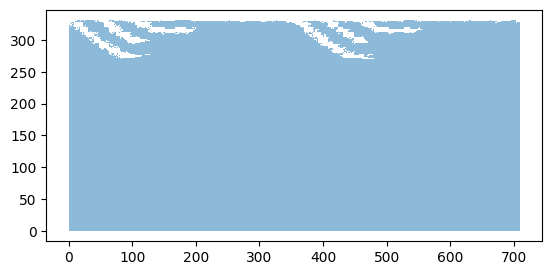

In [95]:
i=0
wave3[i:i+121773-100000].plot(
    aspect='equal', alpha=.5
)